Importing the Required Library 

In [38]:
import pandas as pd
import numpy as np
from easygui import fileopenbox
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
fileopenbox()

'C:\\Users\\parasaran\\Downloads\\framingham.csv'

 Reading The Data 

In [39]:
df=pd.read_csv('C:\\Users\\parasaran\\Downloads\\framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


Checking For The Missing Values

In [40]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Plotting The Graph 

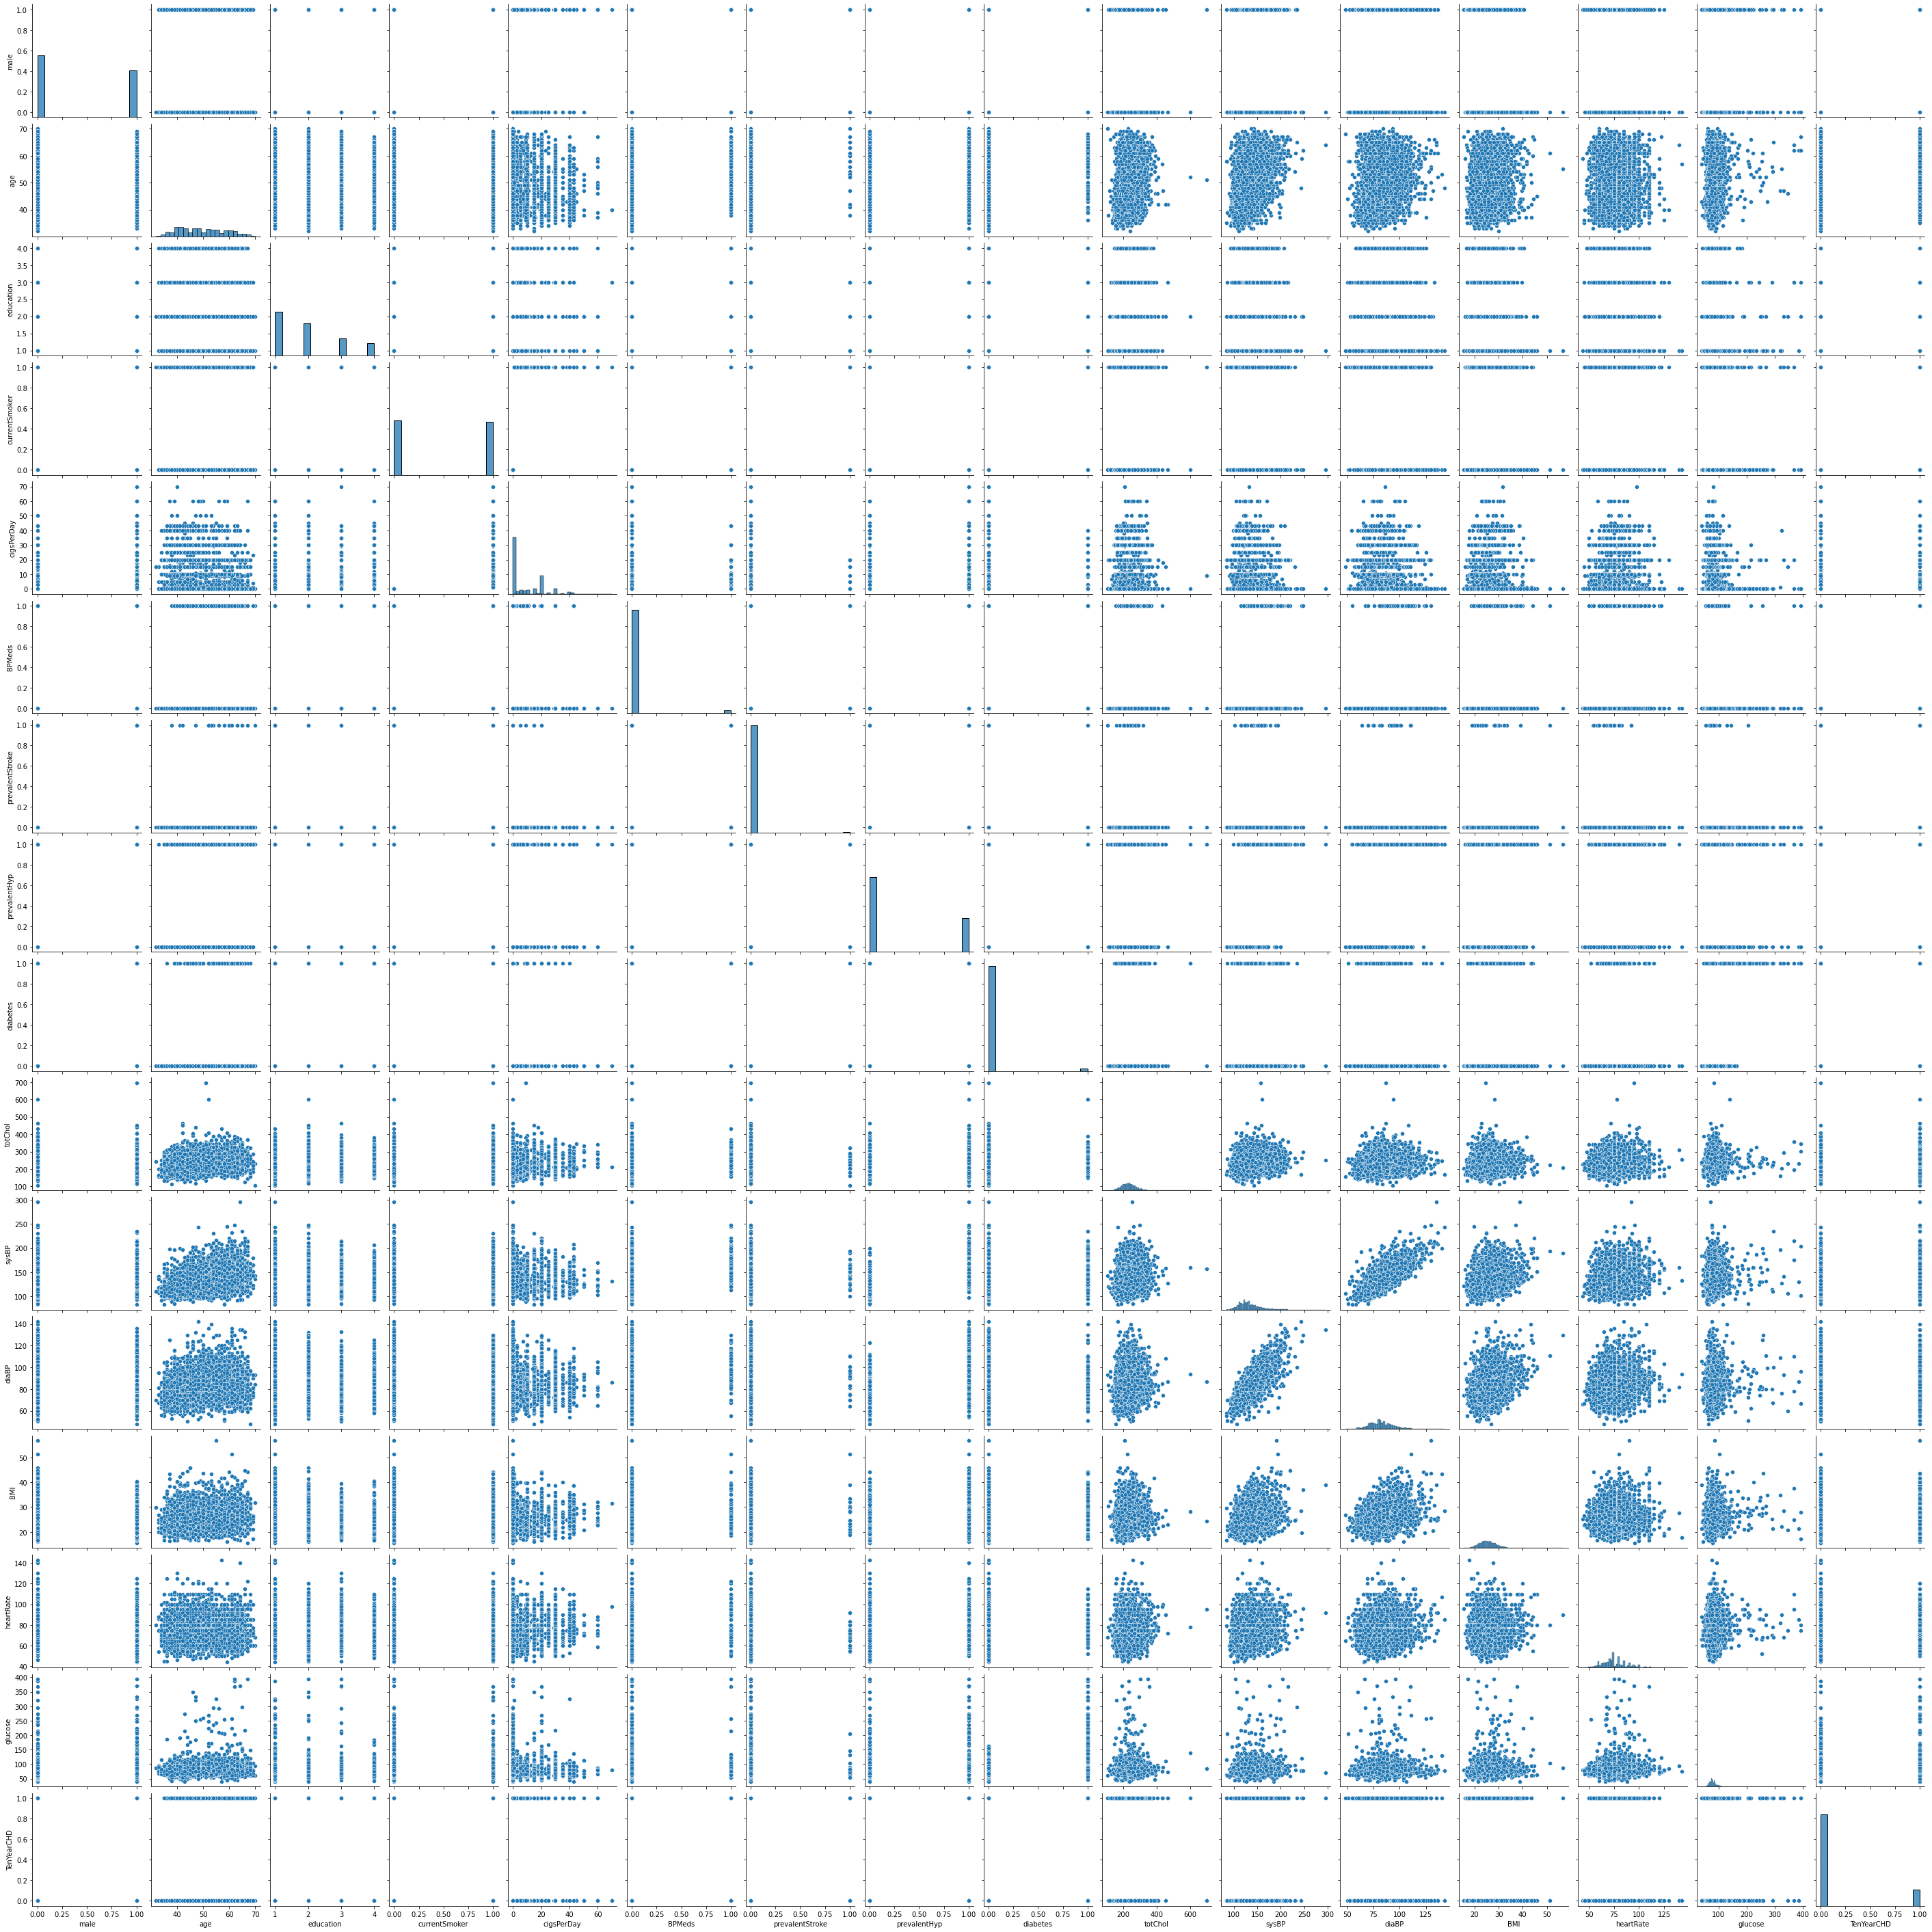

In [42]:
sns.pairplot(df)
plt.show()

Imputing The Missing Values Using The IterativeImputer 

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [44]:
it=IterativeImputer(estimator=LinearRegression())

In [45]:
df.loc[:,['education','heartRate','glucose','BMI','totChol','BPMeds','cigsPerDay']]=it.fit_transform(df.loc[:,['education','heartRate','glucose','BMI','totChol','BPMeds','cigsPerDay']])

In [46]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.000000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.000000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.000000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.000000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.000000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.000000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,3.0,1,43.0,0.000000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,2.0,1,20.0,0.014912,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,80.454687,0


Checking the null values after the imputation

In [47]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Splitting The Data into Train and Test 

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X=df[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

In [50]:
y=df[['TenYearCHD']]

In [51]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

Stadardizing The Data 

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
st=StandardScaler()

In [54]:
train_sc=st.fit_transform(X_train)

In [55]:
test_sc=st.transform(X_test)

Checking For the variance inflation factor

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
vif=[]
for i in range(15):
    vif1=variance_inflation_factor(train_sc,i)
    vif.append(vif1)

In [58]:
vif

[1.2028643058743484,
 1.356758678699083,
 1.0566691953645184,
 2.4853753510095085,
 2.6029828636154604,
 1.0989501648640576,
 1.0181418194940712,
 2.028548947395795,
 1.6150022346855661,
 1.1049263152654452,
 3.7292392786238735,
 2.9982608516073395,
 1.2506723681700953,
 1.1010786190736985,
 1.6378202605341843]

As data are normally distributed we are fitting the model into LogisticRegression

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

In [60]:
kfold=KFold(n_splits=10)

In [61]:
lm=LogisticRegression()

In [62]:
param_log={'solver' : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}

In [63]:
grid=GridSearchCV(estimator=lm,param_grid=param_log,cv=kfold,scoring='accuracy')

In [64]:
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')},
             scoring='accuracy')

In [65]:
grid.score(X_train,y_train)

0.8530006743088334

In [66]:
grid.score(X_test,y_test)

0.8616352201257862

Building model using RandomForestClassifier

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [68]:
kfold=KFold(n_splits=10)

In [69]:
rf=RandomForestClassifier()

In [70]:
param_grid={'n_estimators':[30,40,50,100],'max_features':['auto','sqrt','log'],'criterion':['gini','entropy']}

In [71]:
grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=kfold)

In [72]:
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log'],
                         'n_estimators': [30, 40, 50, 100]})

In [73]:
grid.score(X_train,y_train)

0.9993256911665542

In [74]:
grid.score(X_test,y_test)

0.8561320754716981

CONCLUSION:


From the above result we can conclude that Logistic Regression Algorithm is the best model for this dataset.